# **T&T LAB ASSIGNMENT 12**  
**Name: Shidhu Bhadra  
Roll: 1905348  
Date: 23/03/2022**

In [24]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## Q1. 1.Find out if following variables are significant or insignificant and need to be dropped.
1. Seller-insignificant
2. offerType-insignificant
3. abtest-insignificant
4. vehicleType-significant
5. gearbox,
6. Model
7. Kilometer
8. Fueltype
9. Brand
10. notRepairedDamage

In [25]:
df_main = pd.read_csv("cars_sampled.csv",encoding="latin-1")
df = df_main.copy()
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [26]:
cols = ['dateCrawled', 'name', 'dateCreated', 'lastSeen']
df.drop(columns=cols, inplace=True)
df.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,20257
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,88045
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,27449
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,34537
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,55270


In [27]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

seller
private       49999
commercial        2
Name: seller, dtype: int64

offerType
offer      49998
request        3
Name: offerType, dtype: int64

price
0         1451
500        742
1500       705
1000       647
2500       594
          ... 
103990       1
370000       1
2151         1
225000       1
175000       1
Name: price, Length: 2393, dtype: int64

abtest
test       25869
control    24132
Name: abtest, dtype: int64

vehicleType
limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

yearOfRegistration
2000    3315
2005    3131
1999    3055
2001    2804
2003    2756
        ... 
1928       1
2900       1
8500       1
1940       1
1934       1
Name: yearOfRegistration, Length: 97, dtype: int64

gearbox
manual       36732
automatic    10445
Name: gearbox, dtype: int64

powerPS
0      5605
75     3264
60     2167
150    

In [28]:
cols = ['seller', 'offerType']
df.drop(columns=cols, inplace=True)
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,20257
1,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,88045
2,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,27449
3,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,34537
4,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,55270


In [29]:
cols = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,4450,1,3,2003,1,150,11,150000,3,1,2,0,20257
1,13299,0,8,2005,1,163,243,150000,6,1,39,1,88045
2,3200,1,0,2003,1,101,221,150000,11,1,38,0,27449
3,4500,0,6,2006,1,86,120,60000,12,7,30,1,34537
4,18750,1,8,2008,0,185,243,150000,11,1,39,1,55270


In [30]:
df.shape

(50001, 13)

## Q2. Drop insignificant variables from dataframe ‘cars’.

In [31]:
df.corr()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
price,1.000000,0.002790,-0.011208,0.017604,-0.018165,0.020429,-0.002403,-0.045458,0.000582,-0.013127,-0.007697,0.000496,0.005916
abtest,0.002790,1.000000,0.005034,0.003324,-0.003996,0.001375,-0.001415,-0.003027,0.000621,0.004686,0.006246,-0.001891,0.003096
vehicleType,-0.011208,0.005034,1.000000,0.000573,-0.000225,-0.035590,-0.037315,0.020446,0.006124,-0.035184,0.012066,0.001551,-0.013254
yearOfRegistration,0.017604,0.003324,0.000573,1.000000,0.029205,-0.004394,0.008299,-0.064188,-0.023152,-0.012598,0.004461,-0.027075,-0.001615
gearbox,-0.018165,-0.003996,-0.000225,0.029205,1.000000,-0.142459,0.046735,0.005481,-0.123792,0.126904,0.120576,-0.134239,0.003200
powerPS,0.020429,0.001375,-0.035590,-0.004394,-0.142459,1.000000,-0.035191,-0.016447,0.034345,-0.044093,-0.083801,0.035864,0.017415
model,-0.002403,-0.001415,-0.037315,0.008299,0.046735,-0.035191,1.000000,-0.043010,-0.028372,-0.034566,0.435585,-0.029809,-0.051870
kilometer,-0.045458,-0.003027,0.020446,-0.064188,0.005481,-0.016447,-0.043010,1.000000,0.001985,-0.104424,-0.031284,0.011241,-0.024076
monthOfRegistration,0.000582,0.000621,0.006124,-0.023152,-0.123792,0.034345,-0.028372,0.001985,1.000000,-0.062377,-0.018635,0.100694,0.019050
fuelType,-0.013127,0.004686,-0.035184,-0.012598,0.126904,-0.044093,-0.034566,-0.104424,-0.062377,1.000000,0.038798,-0.002292,-0.014061


In [32]:
cols = ['abtest', 'model', 'monthOfRegistration', 'brand', 'postalCode', 'notRepairedDamage']
df.drop(columns=cols, inplace=True)
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType
0,4450,3,2003,1,150,150000,1
1,13299,8,2005,1,163,150000,1
2,3200,0,2003,1,101,150000,1
3,4500,6,2006,1,86,60000,7
4,18750,8,2008,0,185,150000,1


In [33]:
cor = df.corr()

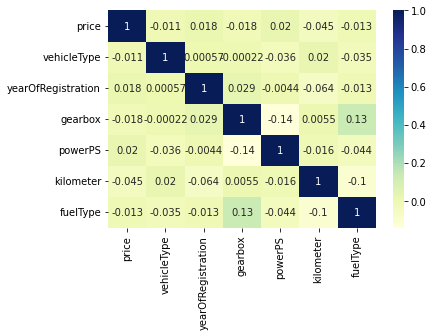

In [34]:
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Q3. Find correlation between all numerical variables and find which variable has the highest correlation with price

In [35]:
print(cor['price'])
print('Highest: kilometer (abs vale of 0.045458)')

price                 1.000000
vehicleType          -0.011208
yearOfRegistration    0.017604
gearbox              -0.018165
powerPS               0.020429
kilometer            -0.045458
fuelType             -0.013127
Name: price, dtype: float64
Highest: kilometer (abs vale of 0.045458)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['price']), df['price'], test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((35000, 6), (35000,), (15001, 6), (15001,))

## Q4. Calculate the training data and testing data score using a linear regression model.

In [37]:
algo = "Linear Regression\n"
model = LinearRegression()
model.fit(x_train, y_train)
print(algo)


print('Training error')
y_pred = model.predict(x_train)
e = (y_pred - y_train)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

print('Testing error')
y_pred = model.predict(x_test)
e = (y_pred - y_test)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

Linear Regression

Training error
119387.02623830286
Testing error
101083.27150242047
